## <center> Преобразование признаков

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.api as sm

### Подключение гугл диска для работы через Google Colaboratory

In [5]:
''' Для работы в Google Colaboratory'''  
# Подключаемся к гугл диску, для чтения файлов из него 
# При выполнении кода появится ссылка, по которой нужно перейти и выбрать гугл-аккаунт, к которому хотите подключиться
# Далее разрешить доступ к аккаунту, далее скопировать код и вставить в окошко
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# При чтении/записи файлов из гугл-диска через Google Colaboratory обязательно указывтаь в начале путь "drive/My Drive/", 
# а после путь к файлу
df = pd.read_excel('drive/My Drive/Курс по анализу данных/Магистры 1 курс/Нормализация данных/data_house_prices_2_clean.xlsx')
df.describe()

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,189391.660000,9815.870000,1971.570000,1983.920000,121.640000,6.270000,3763.429695,19914.99000
std,89197.223552,3314.516006,29.348569,20.967353,213.553982,1.420307,2161.906593,5166.36084
min,40000.000000,1596.000000,1910.000000,1950.000000,0.000000,4.000000,44.000000,1039.00000
25%,129900.000000,7643.250000,1954.750000,1964.750000,0.000000,5.000000,2475.250000,17725.50000
50%,159500.000000,9595.500000,1971.000000,1994.000000,0.000000,6.000000,3202.216495,20706.00000
75%,227000.000000,11243.250000,2000.250000,2003.250000,188.500000,7.000000,5521.750000,23343.25000
max,480000.000000,20271.000000,2009.000000,2009.000000,1115.000000,11.000000,7895.000000,29417.00000


### ___

Для работы с локального Jupyter считываем файл как обычно:

### 1. Нормализация и стандартизация данных

Как видно, данные каждого из столбцов изменяются в разных масштабах, это хорошо видно, если сравнить минимальные и максимальные значения столбцов: **Price** изменяется в от 40000 до 480000, в то время как **RoomsNumb** от 4 до 11. Кроме этого, данные бывают разными по физическому

Некоторые алгоритмы чувствительны к диапазону изменения входных данных,  настолько разный масштаб значений может привести к некорректным результатам моделирования. Поэтому, в таких случаях к данным применяют **нормализацию** или **стандартизацию**

### Нормализация

Нормализация подразумевает изменение диапазонов данных. Например, можно привести даныне к диапазону от 0 до 1, или от -1 до 1.  

**MinMax** нормализации - такая нормализация приводит данные к диапазону от 0 до 1. Подходит для данных без выбросов

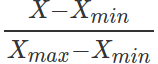

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [12]:
# создаем объект MinMaxScaler
min_max_scaler = MinMaxScaler()
# передаем данные
min_max_feature = min_max_scaler.fit_transform(df['MasVnrArea'].values.reshape(-1, 1))
# проверяем, в каком теперь диапазоне данные
min_max_feature.min(), min_max_feature.max() , min_max_feature.mean() , min_max_feature.std() 

(0.0, 1.0, 0.10909417040358745, 0.19056818808489517)

Убедимся в том, что тип распределения **MasVnrArea** не изменился после нормализации

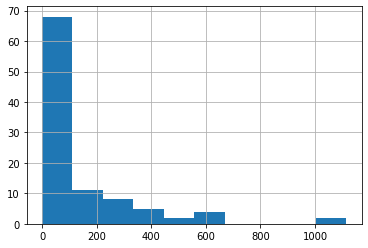

In [13]:
df['MasVnrArea'].hist();

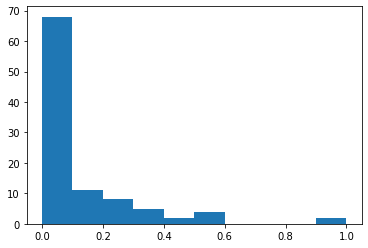

In [14]:
plt.hist(min_max_feature);

In [15]:
# Переведем Нормализуем все данные
df_n = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
df_n.head()

,Price,Area,YearBuilt,YearRestoration,MasVnrArea,RoomsNumb,SchoollDistance,CenterDistance
0,0.772727,0.367015,0.939394,0.898305,0.175785,0.571429,0.376003,0.671013
1,0.321591,0.428594,0.666667,0.440678,0.000000,0.285714,0.963189,0.497991
2,0.417045,0.516948,0.919192,0.881356,0.145291,0.285714,0.740288,0.575411
3,0.227273,0.425917,0.050505,0.338983,0.000000,0.428571,0.604382,0.731870
4,0.477273,0.678126,0.909091,0.847458,0.313901,0.714286,0.153356,0.535661


### Стандартизация

**Простая стандартизация (StandardScaler)** изменяет форму распределения данных к такому виду, при котором их среднее равно 0, а стандартное отклонение - 1. Подходит для данных без выбросов

$$ \large{ x_i = \frac{x_i - \overline{X}}{\sigma_x} }$$

$ \overline{X}$ - среднее значение 

$ \sigma_x$ - стандартное отклонение

In [ ]:
standart_scaler = StandardScaler()
standart_feature = standart_scaler.fit_transform(df['MasVnrArea'].values.reshape(-1, 1))
standart_feature.min(), standart_feature.max() , round(standart_feature.mean(), 2) , standart_feature.std() 

(-0.5724678998101598, 4.6749976402122675, -0.0, 0.9999999999999999)

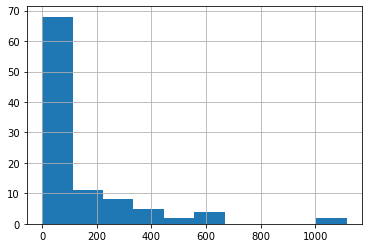

In [ ]:
df['MasVnrArea'].hist();

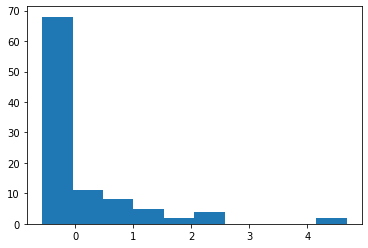

In [ ]:
plt.hist(standart_feature);

**RobustScaler** - этот вид стандартизации, основанный на медиане и межквартильном диапазоне, поэтому этот вид стандартизации устойчив к выбросам

$$ \large{ x_{scale} = \frac{x_i - X_{med}}{x_{75} - x_{25}} }$$

$X_{med}$ - медиана 

$x_{25}$ - 25-й перцентиль

$x_{75}$ - 75-й перцентиль

<img src='https://github.com/MalikaL17/course_materials/blob/main/img/%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BD%D1%82%D0%B8%D0%BB%D1%8C.PNG?raw=true'>

In [ ]:
robust_scaler = RobustScaler()
robust_feature = robust_scaler.fit_transform(df['MasVnrArea'].values.reshape(-1, 1))
robust_feature.min(), robust_feature.max() , robust_feature.mean() , robust_feature.std() 

(0.0, 5.915119363395226, 0.6453050397877983, 1.1272335793881068)

### 2. Преобразование признаков

**Бинаризация** 

Бинаризация подразумевает разбиение признака на два значения, чаще всего 0 и 1.

In [ ]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, FunctionTransformer

 Указываем границу, по которой хотим разбить и разбиваем каждый признак на "меньше гараицы" - 0 и "больше границы" - 1**

In [ ]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = Binarizer(threshold=[4]).fit(X)
est.transform(X)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

Можно бинаризовать методами **pandas**: применить функцию **apply()** c lambda-выражением

In [ ]:
df['RoomsNumb'].apply(lambda x: 0 if x <=6  else 1)

0     1
1     0
2     0
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: RoomsNumb, Length: 100, dtype: int64

**Разбить данные на заданные диапазоны**

In [ ]:
# Разбиваем на 3 равных диапазона 
pd.cut(df['RoomsNumb'], bins=3, ).head() #labels=['мало', 'средне', 'много']

0    (6.333, 8.667]
1    (3.993, 6.333]
2    (3.993, 6.333]
3    (6.333, 8.667]
4     (8.667, 11.0]
Name: RoomsNumb, dtype: category
Categories (3, interval[float64]): [(3.993, 6.333] < (6.333, 8.667] < (8.667, 11.0]]

In [ ]:
df['RoomsNumb'].head()

0    8
1    6
2    6
3    7
4    9
Name: RoomsNumb, dtype: int64

In [ ]:
# Разбиваем по заданным интервалам
bins = [0, 2, 5, 8, 10, np.inf]
labels = ['< 2 rooms', '2-5 rooms', '5-8 rooms', '8-10 rooms', '> 10 rooms']
pd.cut(df['RoomsNumb'], bins=bins, labels=labels ).head()

0     5-8 rooms
1     5-8 rooms
2     5-8 rooms
3     5-8 rooms
4    8-10 rooms
Name: RoomsNumb, dtype: category
Categories (5, object): ['< 2 rooms' < '2-5 rooms' < '5-8 rooms' < '8-10 rooms' < '> 10 rooms']

**Кодирование порядковых категориальных признаков**

Порядковые категориальный признаки подразумевают, что мы можем упорядочить из по возрастанию / убыванию, а значит, можем поставить им в соответсвие возрастующую / убывающую последовательность чисел

In [ ]:
df2 = pd.DataFrame({"Oценка": ["низкая", "низкая", "средняя", "средняя", "высокая", "низкая"]})
df2

,Oценка
0,низкая
1,низкая
2,средняя
3,средняя
4,высокая
5,низкая


In [ ]:
# создадим словарь, сопоставляющий учитывающий порядок значимости
scale_mapper = {"низкая":1,
                "средняя":2,
                "высокая":3}

In [ ]:
df2['Oценка'].map(scale_mapper)

0    1
1    1
2    2
3    2
4    3
5    1
Name: Oценка, dtype: int64

**Кодирование номинальных категориальных признаков**

В номинальных категориальных признаках значения не имеют порядкового отношения

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
feature = np.array([["Texas"],
                    ["California"],
                    ["Texas"],
                    ["Florida"],
                    ["Texas"]])
df3 = pd.DataFrame(feature, columns=['State'])
df3

,State
0,Texas
1,California
2,Texas
3,Florida
4,Texas


In [ ]:
# Создадим кодировщик
one_hot = LabelBinarizer()
# применим преобразования
ohe_feature = one_hot.fit_transform(df3['State'])
ohe_feature

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
# посмотрим как распределились классы в трансформере
one_hot.classes_

array(['California', 'Florida', 'Texas'], dtype='<U10')

In [ ]:
# можно применить обратное кодирование
one_hot.inverse_transform(ohe_feature)

array(['Texas', 'California', 'Texas', 'Florida', 'Texas'], dtype='<U10')

 Сделать то же самое в **pandas** можно с помощью функции **get_dummies()**

In [ ]:
pd.get_dummies(df3)

,State_California,State_Florida,State_Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


**Кодирование словарей**

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
data_dict = [{"красный": 2, "синий" : 4},
             {"красный": 4, "синий": 3},
             {"красный": 1, "желтый": 2},
             {"красный": 2, "желтый": 2}]

In [ ]:
# создаем трансформер. sparse=False указывает на то, что нужно создать обычную матрицу, не разреженную
dictvectorizer = DictVectorizer(sparse=False)

In [ ]:
# применяем трансформер
features = dictvectorizer.fit_transform(data_dict)
# результат трансформации
features

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

In [ ]:
# классы, которые запомнил трансформер данных. Их можно применить для создания имен признаков
dictvectorizer.get_feature_names()

['желтый', 'красный', 'синий']

In [ ]:
pd.DataFrame(features, columns=dictvectorizer.get_feature_names())

,желтый,красный,синий
0,0.0,2.0,4.0
1,0.0,4.0,3.0
2,2.0,1.0,0.0
3,2.0,2.0,0.0
